# FoodHub Data Analysis

## **Analysis by: 'Femi Bolarinwa**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [1]:
#libraries for data manipulation
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#FB
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [271]:
# read the data
mydata_original = pd.read_csv('foodhub_order.csv')
df = mydata_original.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Shape of Data

In [272]:
df.shape #return the dimension of the dataframe 

(1898, 9)

#### Observations:


    1)There are 1898 rows and 9 columns in the data.

### Datatypes of columns

In [273]:
df.info() #return info about dataframe structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


    1)4 columns have 'object' datatype.
    2)4 columns have 'int' datatype.
    3)1 column has 'float' datatype.
    4)No column has missing values.
    5)The dataframe takes up about 134kb  of storage.

### Missing values check

In [274]:
df.isnull().sum().to_frame() #return count of null cell in each column

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


    1)There are no missing values in the data.

### Statistical Summary

In [275]:
round(df.describe().T,2) #return the statistical summary of numerical variables in 2 decimal places

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [276]:
df.describe(include = 'object').T #return the statistical summary of categorical variables

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:


    1)Average time to prepare food is 27.37 minutes. Minimum is 20 minutes and maximum is 35 minutes.
    2)Delivery time has a similar distribution to preparation time, but with slightly more variation.
    3)Cost of order has a mean value of 16.5dollars, and varies between 4.47dollars and 35.41dollars.
    4)Shake Shack is the most popular restaurant. 
    5)American cuisine is most people's favorite.
    6)Most orders come during the weekend. 
    7)And most people did not leave a rating.

### Number of Unrated Orders

In [277]:
df['rating'].value_counts() #return the count of each category in 'rating' column

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


    1)736 orders are not rated. 
    2)Most occuring rating is 5.
    3)Least occuring rating is 3.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

##### Order ID

In [278]:
df['order_id'].nunique() #return the count of unique orders

1898

#### Observations:


    1)There are 1898 unique orders. 
    2)That means every order in the data is unique since there are 1898 rows in the data.

##### Customer ID

In [279]:
df['customer_id'].nunique() #return the count of unique customers

1200

#### Observations:


    1)There are 1200 unique customers in the data. 
    2)That means some customers ordered more than once since there are more orders than customers.

##### Restaurant Name

In [280]:
df['restaurant_name'].nunique() #return the count of unique restaurants

178

#### Observations:


    1)There are 178 unique restaurants in the data

In [281]:
#Custom Function to create countplots for categorical variables.
#Custom Function indicates percentage for each category of a variable.
#Custom Function orders the bars in decreasing order of height/percentage.
#Custom Function takes in dataframe and column name as inputs.
def bar_perc(data, z): 
    total = len(data[z]) # Length of the column.
    plt.figure(figsize = (20, 5)) #specify size of figure.
    ax = sns.countplot(data[z], palette = 'Paired',order = data[z].value_counts().index) #countplot
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
    plt.show()                                                      # Display the plot

##### Cuisine Type

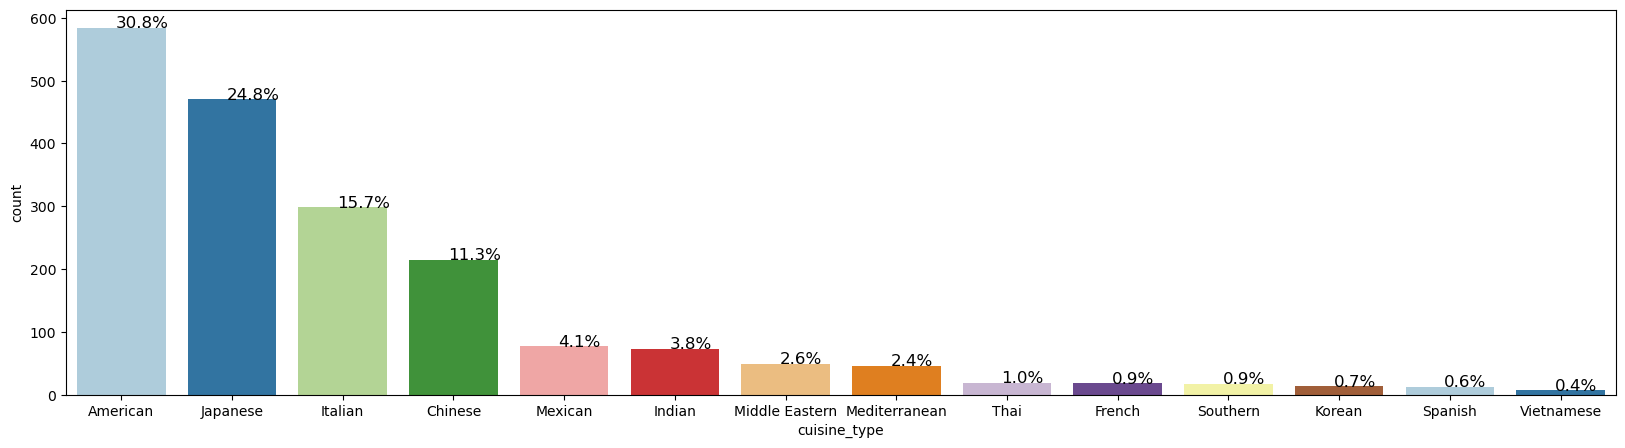

In [282]:
bar_perc(df, 'cuisine_type') #apply custom function to cuisine type

#### Observations:


    1)American, Japanese and Italian are the most popular cuisines.
    2)Vietnamese, Spanish and Korean are the least popular cuisines.
    3)6 cuisines each represent 1% or less of the total number of orders.

##### Day of the week

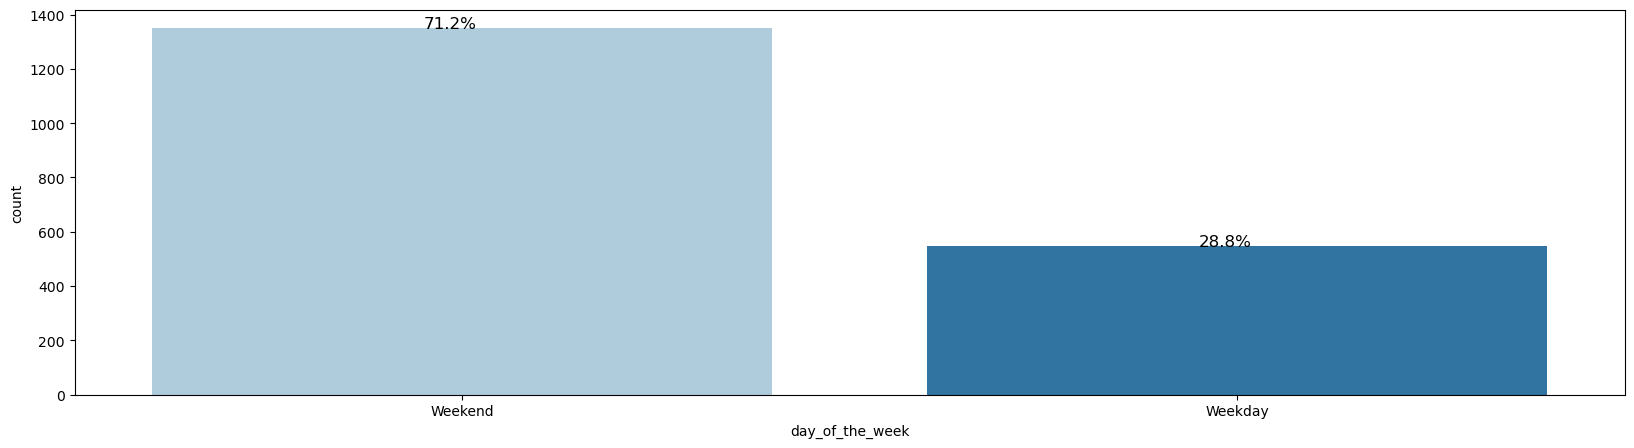

In [283]:
bar_perc(df, 'day_of_the_week') #apply custom function to day of the week

In [284]:
df['day_of_the_week'].value_counts().to_frame() #return counts of categories in 'day_of_the_week'

,day_of_the_week
Weekend,1351
Weekday,547


#### Observations:


    1)There are significantly more orders on weekends than weekdays, more than twice as much.

##### Rating

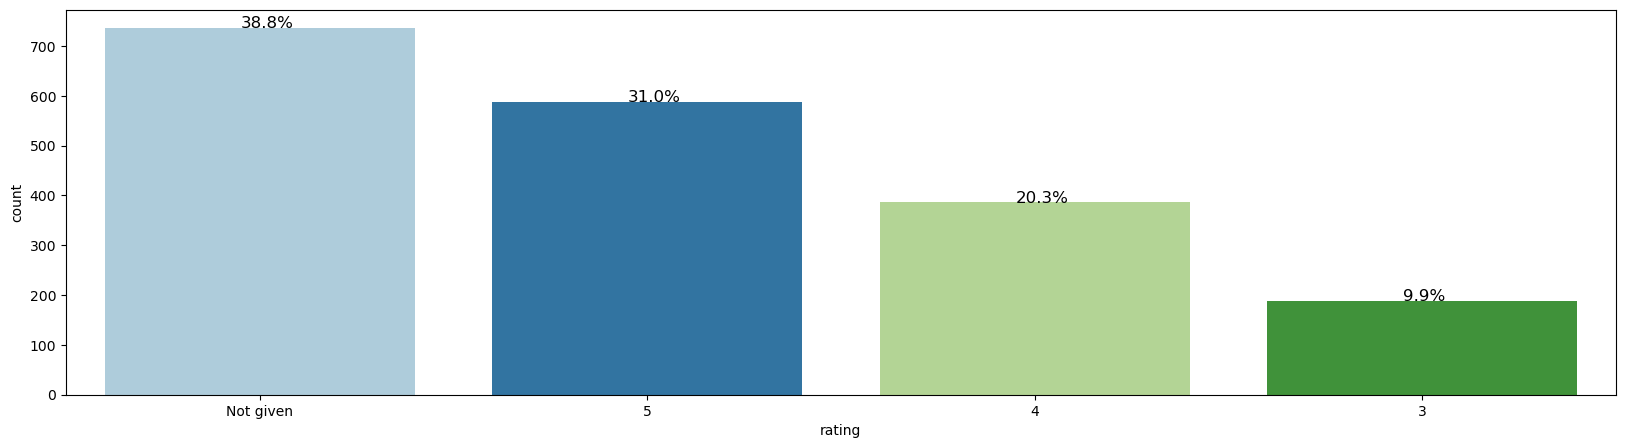

In [285]:
bar_perc(df, 'rating') #apply custom function to 'rating'

In [286]:
df['rating'].value_counts().to_frame() #return counts of categories in 'rating'

,rating
Not given,736
5,588
4,386
3,188


#### Observations:


    1)Most orders dont have a rating. 
    2)5 is the most frequent rating. 
    3)3 is the least frequent rating.

In [287]:
#Custom function to create histogram and boxplot for continuous (numerical) variables.
#The two plots are shown on the same horizontal scale.
#A green vertical line indicates the mean point on the plots.
#A black vertical line indicates the median point on the plots.
#Function takes in column name and desired figure size as inputs.
def histogram_boxplot(feature, figsize = (15,5), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize) 
    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using green arrow
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    # Histogram
    sns.distplot(feature, kde = True, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    plt.ylabel('count')
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean line to the histogram
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median line to the histogram

##### Cost of the order

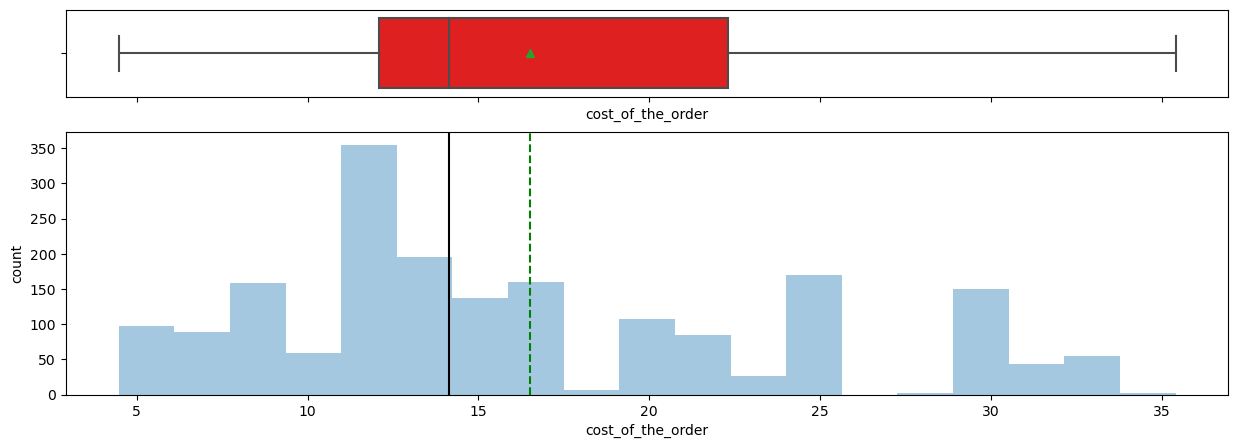

In [288]:
histogram_boxplot(df['cost_of_the_order']) #apply custom function to 'cost of the order'

#### Observations:


    1)Distribution of cost is right skewed since mean is greater than the median.
    2)75% of orders are less than 23 dollars.
    3)No outliers.

##### Food preparation time

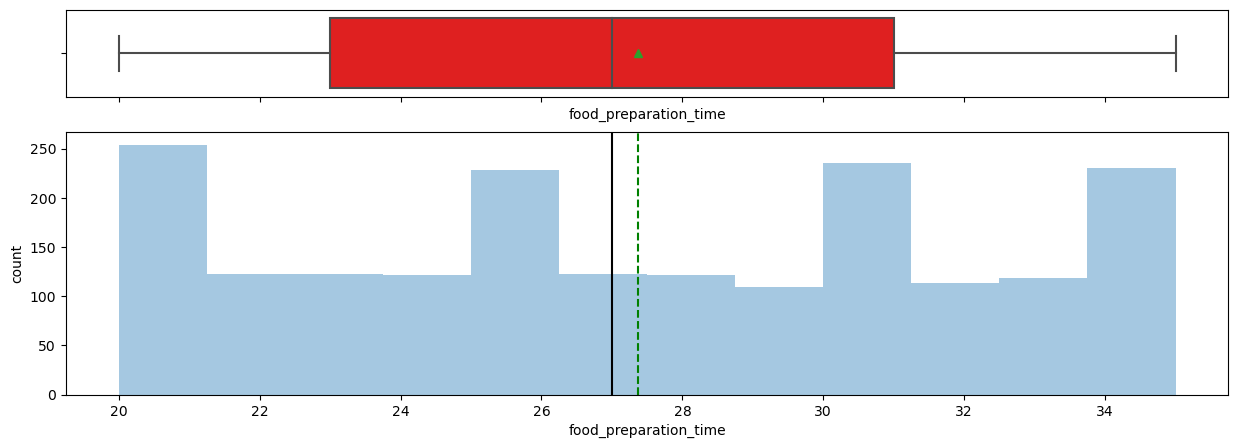

In [289]:
histogram_boxplot(df['food_preparation_time']) #apply custom function to 'food preparation time'

#### Observations:


    1)Distribution of food preparation time appears almost uniform but slightly skewed to the right since mean is greater than the median.
    2)50% of orders took more than 27 minutes to be prepared.
    3)No outliers.

##### Delivery time

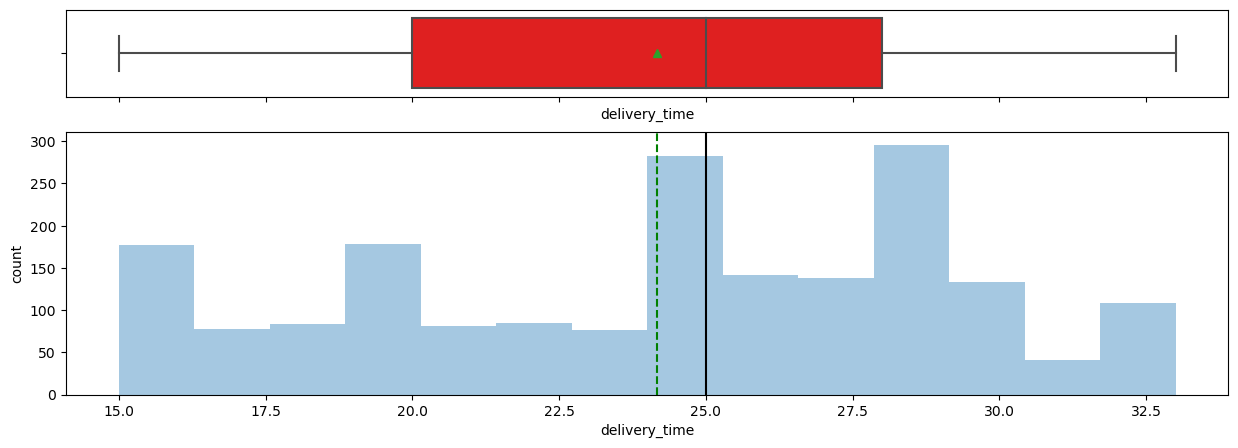

In [290]:
histogram_boxplot(df['delivery_time']) #apply custom function to 'delivery time'

#### Observations:


    1)Distribution of delivery time appears slightly skewed to the left since mean is less than median.
    2)25% of orders took less than 20 minutes to be delivered.
    3)No outliers.

### Top 5 Restaurants with most orders

In [291]:
df['restaurant_name'].value_counts().to_frame().head(5) #return counts of top 5 restaurants

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


    1)Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants in that order.

### Most popular cuisine on weekends

In [292]:
#select weekend orders only and return count of cuisines
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().to_frame()

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15
French,13


#### Observations:


    1)American is the most popular cuisines on weekends followed by Japanese and Italian.
    2)Vietnamese, Spanish and Korean are the least popular cuisines on weekends.

### Percentage of the orders above 20 dollars

In [293]:
l_1 = len(df[df['cost_of_the_order']>20]) #select and count number of orders above $20
l =len(df)                                #total number of orders
per = round(l_1/l,4)                      #calculate ratio to 4 dp
print(per*100)                            #print percentage

29.24


In [294]:
#Alternatively
round(df[df['cost_of_the_order']>20].shape[0]/df.shape[0],4)*100

29.24

#### Observations:


    1)About 30% of orders cost more than $20

### Average order delivery time

In [295]:
#apply mean method to the 'delivery_time' series and round to 2dp
round(df['delivery_time'].mean(),2) 

24.16

#### Observations:


    1)Average order delivery time is 24.16 minutes

### Top 3 most frequent customers

In [296]:
#apply value_counts method to the df['customer_id'] series and select top 3 result
df['customer_id'].value_counts().to_frame().head(3) 

,customer_id
52832,13
47440,10
83287,9


#### Observations:


    1)IDs of the top 3 most frequent customers are 52832, 47440, 83287. 
    2)They made 13, 10 and 9 orders respectively.
    3)They qualify for the discount vouchers.

### Multivariate Analysis

### Multivariate analysis to explore relationships between the important variables in the dataset

#### Cuisine vs Cost of the order

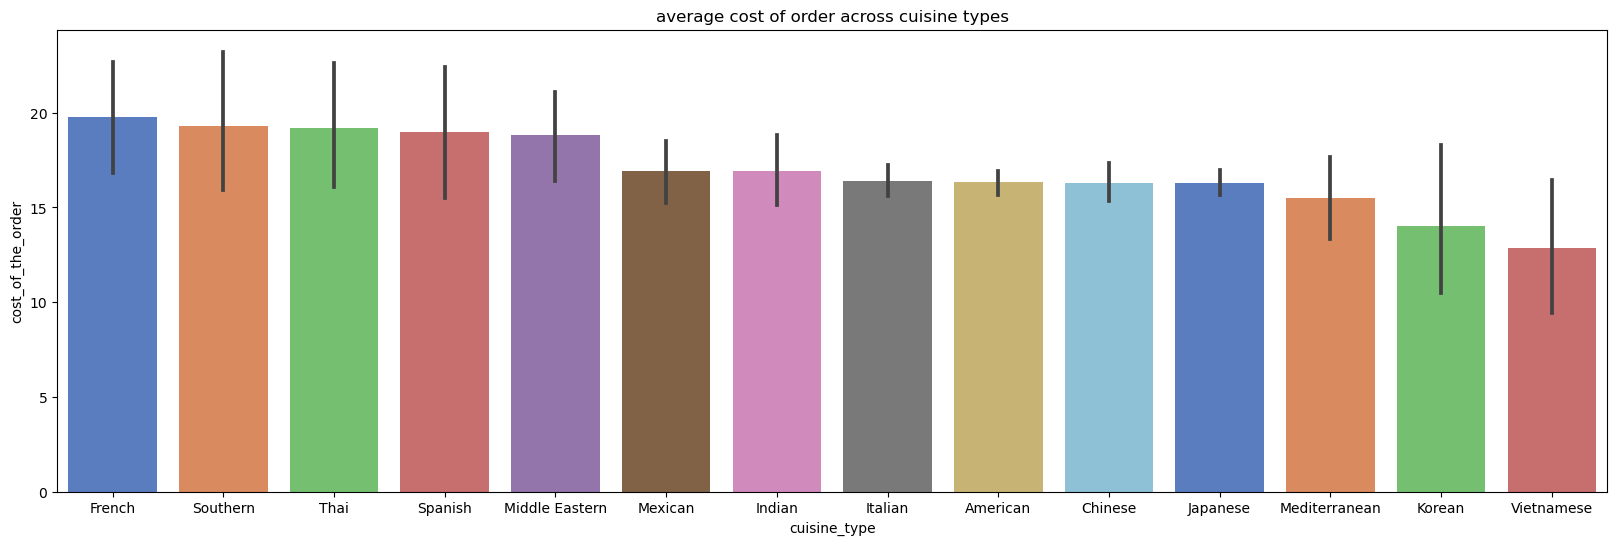

In [297]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False).index.values
#barplot
ax = sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='muted',order=plot_order)
plt.title('average cost of order across cuisine types')
plt.show()

In [298]:
#return average cost for all cuisine categories, sort and round to 2 decimal places
round(df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False),2)

cuisine_type
French            19.79
Southern          19.30
Thai              19.21
Spanish           18.99
Middle Eastern    18.82
Mexican           16.93
Indian            16.92
Italian           16.42
American          16.32
Chinese           16.31
Japanese          16.30
Mediterranean     15.47
Korean            14.00
Vietnamese        12.88
Name: cost_of_the_order, dtype: float64

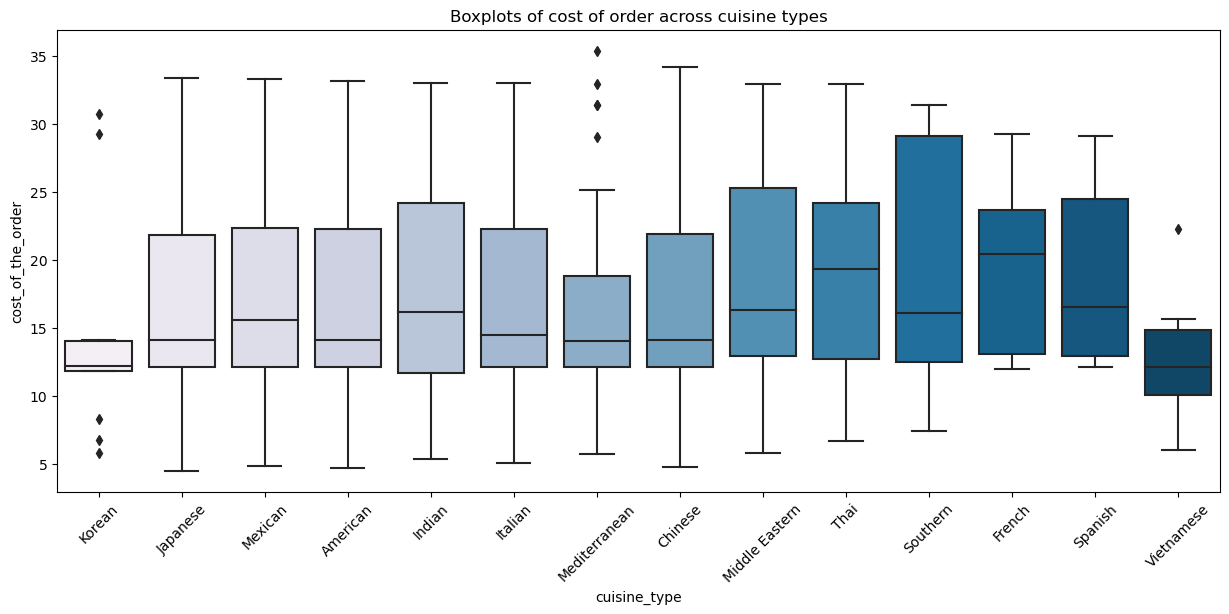

In [299]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 45)
plt.title('Boxplots of cost of order across cuisine types')
plt.show()

#### Observation

    1)French is the most expensive cuisine.
    2)Vietnamese cuisine is the most affordable.
    3)Most cuisines have wide variation in their distribution of the order cost.
    4)Korean and Mediterranean cuisines have significant outliers in their cost distributions. 
    5)Vietnamese has a single outlier.

#### Cuisine vs Food Preparation time

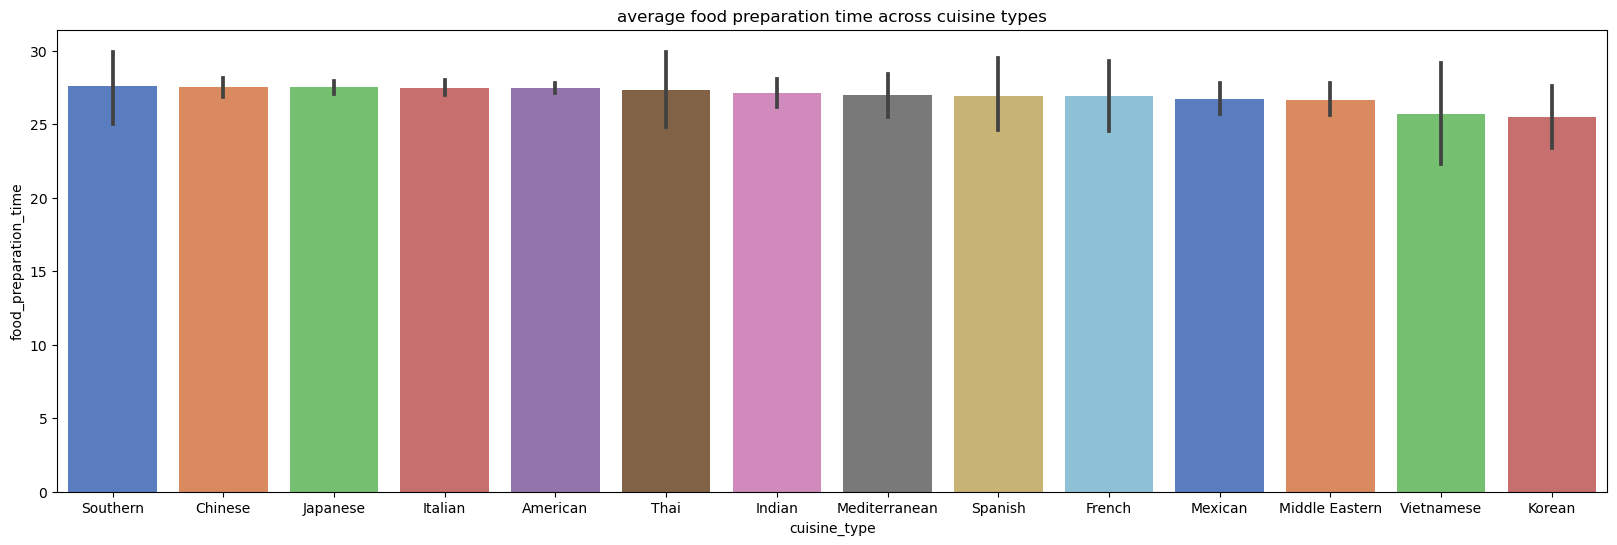

In [300]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False).index.values
#barplot
ax = sns.barplot(x='cuisine_type', y='food_preparation_time', data=df, palette='muted',order=plot_order)
plt.title('average food preparation time across cuisine types')
plt.show()

In [301]:
#return mean prparation time for all cuisine categories, sort and round to 2 decimal places
round(df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False),2)

cuisine_type
Southern          27.59
Chinese           27.51
Japanese          27.51
Italian           27.48
American          27.44
Thai              27.32
Indian            27.11
Mediterranean     27.00
Spanish           26.92
French            26.89
Mexican           26.73
Middle Eastern    26.67
Vietnamese        25.71
Korean            25.46
Name: food_preparation_time, dtype: float64

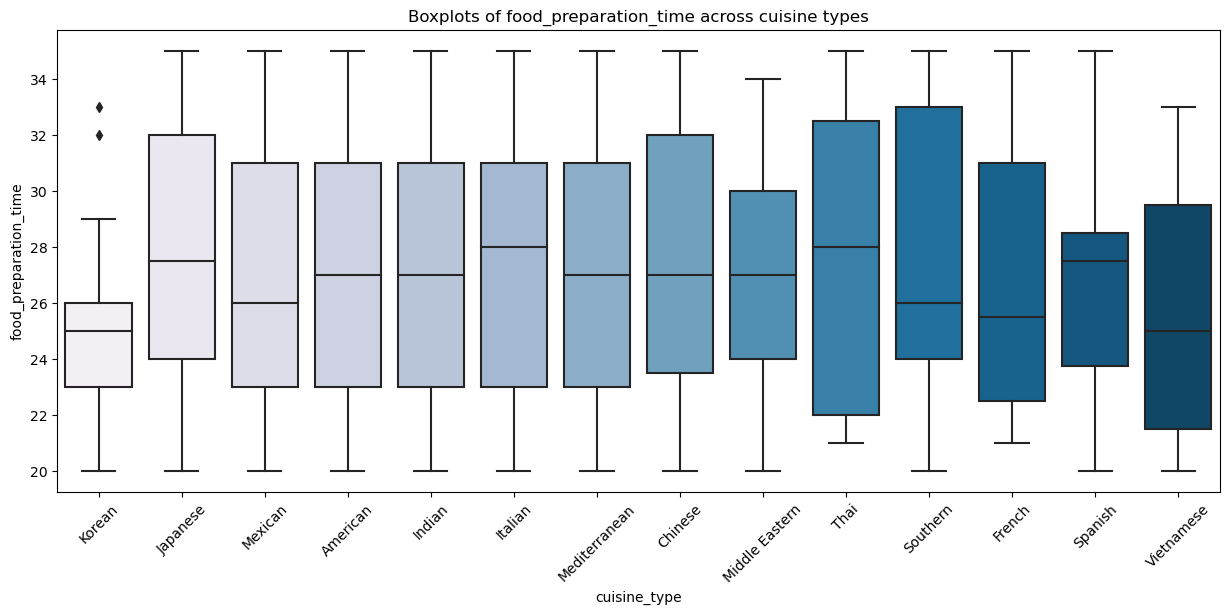

In [302]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "cuisine_type", y = 'food_preparation_time', data = df, palette = 'PuBu')
plt.xticks(rotation = 45)
plt.title('Boxplots of food_preparation_time across cuisine types')
plt.show()

#### Observation

    1)All the cuisine types have very similar mean preparation time.
    2)On average, Korean cuisine is the quickest to prepare.
    3)On average, Southern cuisine takes the longest.
    4)Some cuisines have wide variation in their distribution of the food preparation time.
    5)Korean has two outliers.

#### Day of the Week vs Delivery time

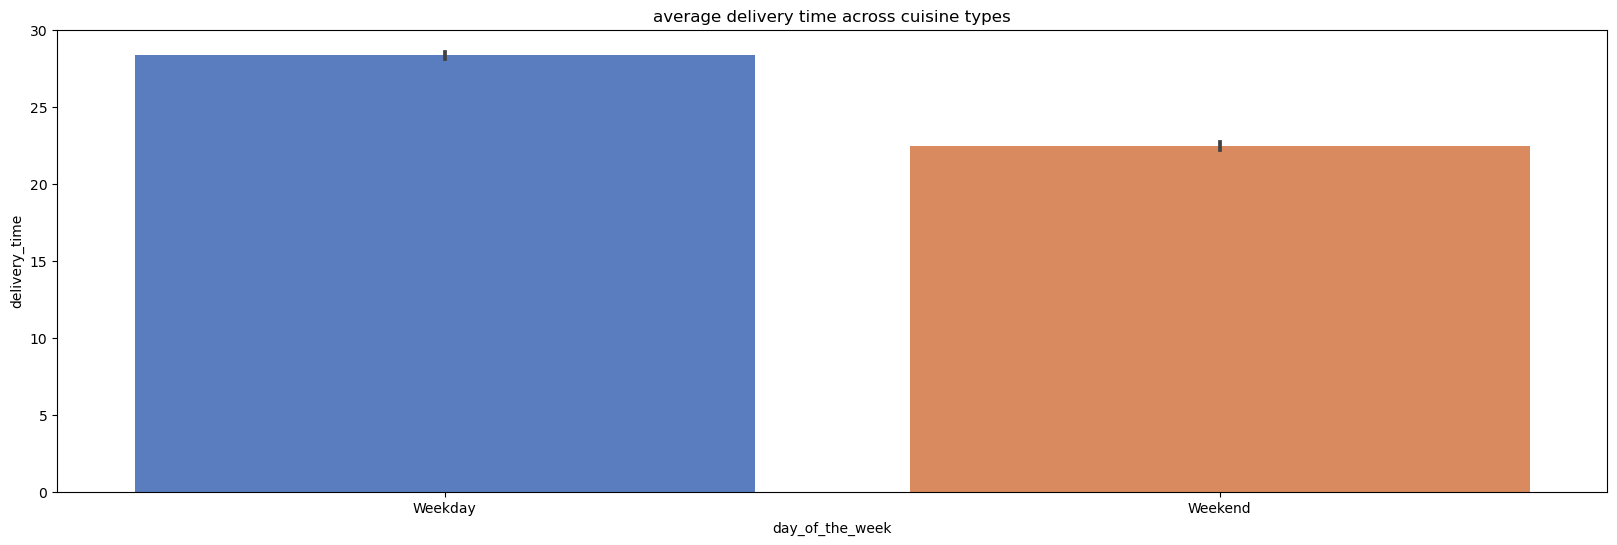

In [303]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df.groupby('day_of_the_week')['delivery_time'].mean().sort_values(ascending=False).index.values
#barplot
ax = sns.barplot(x='day_of_the_week', y='delivery_time', data=df, palette='muted',order=plot_order)
plt.title('average delivery time across cuisine types')
plt.show()

In [304]:
#return average delivery time across 'day of the week' categories and round to 2 decimal places
round(df.groupby(['day_of_the_week']).agg({'delivery_time':['mean']}),2)

,delivery_time
,mean
day_of_the_week,
Weekday,28.34
Weekend,22.47


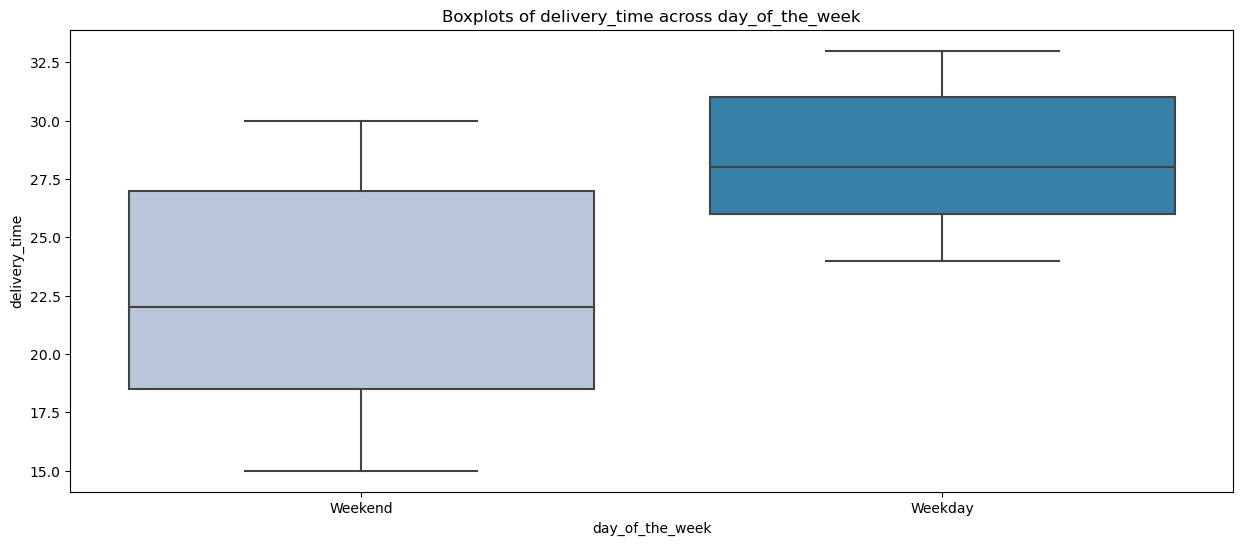

In [305]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu')
plt.title('Boxplots of delivery_time across day_of_the_week')
plt.show()

#### Observation

    1)On average, weekday orders take about 6 minutes longer than weekend orders to be delivered. 
    2)This could be attributed to traffic level during weekdays.
    3)Weekend orders have more variation in their distribution of the delivery time.

#### Day of the Week vs total time

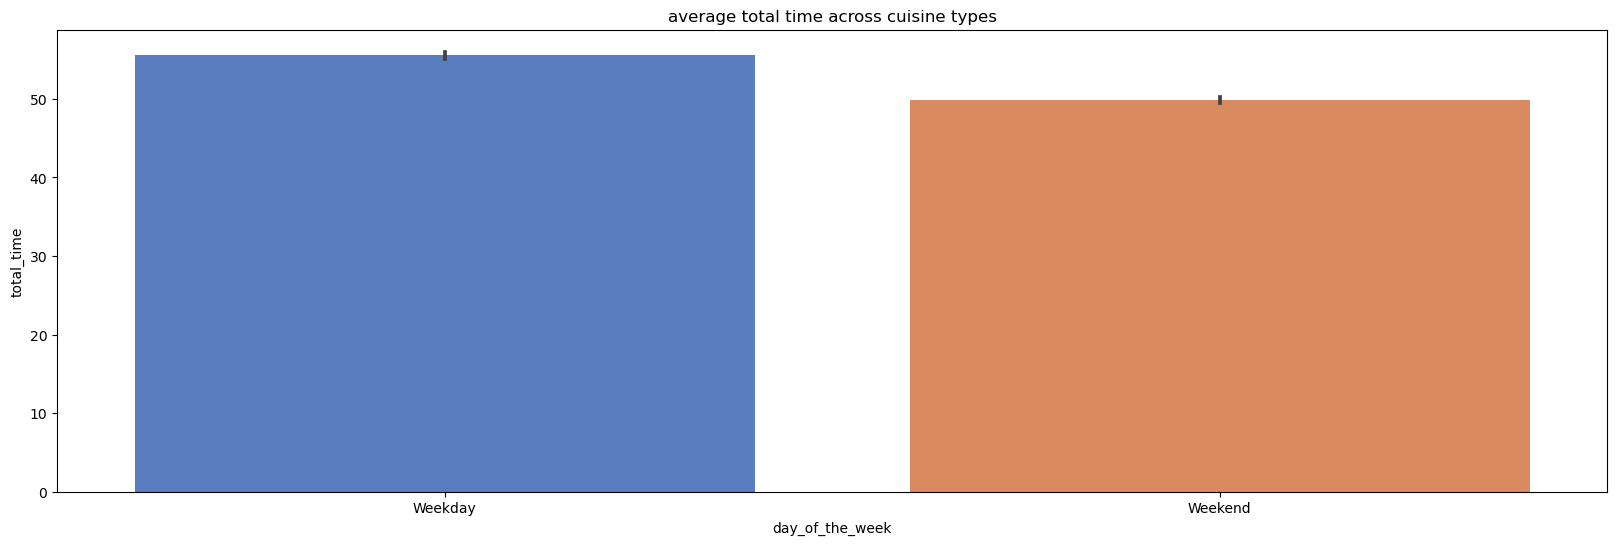

In [306]:
df_duplicate = df.copy() #create duplicate of dataframe
#compute total time to prepare and deliver food
df_duplicate['total_time'] = df_duplicate['delivery_time'] + df_duplicate['food_preparation_time']
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df_duplicate.groupby('day_of_the_week')['total_time'].mean().sort_values(ascending=False).index.values
#barplot
ax = sns.barplot(x='day_of_the_week', y='total_time', data=df_duplicate, palette='muted',order=plot_order)
plt.title('average total time across cuisine types')
plt.show()

In [307]:
#return average total time across 'day of the week' categories and round to 2 decimal places
round(df_duplicate.groupby('day_of_the_week').agg({'total_time':['mean']}),2)

,total_time
,mean
day_of_the_week,
Weekday,55.55
Weekend,49.91


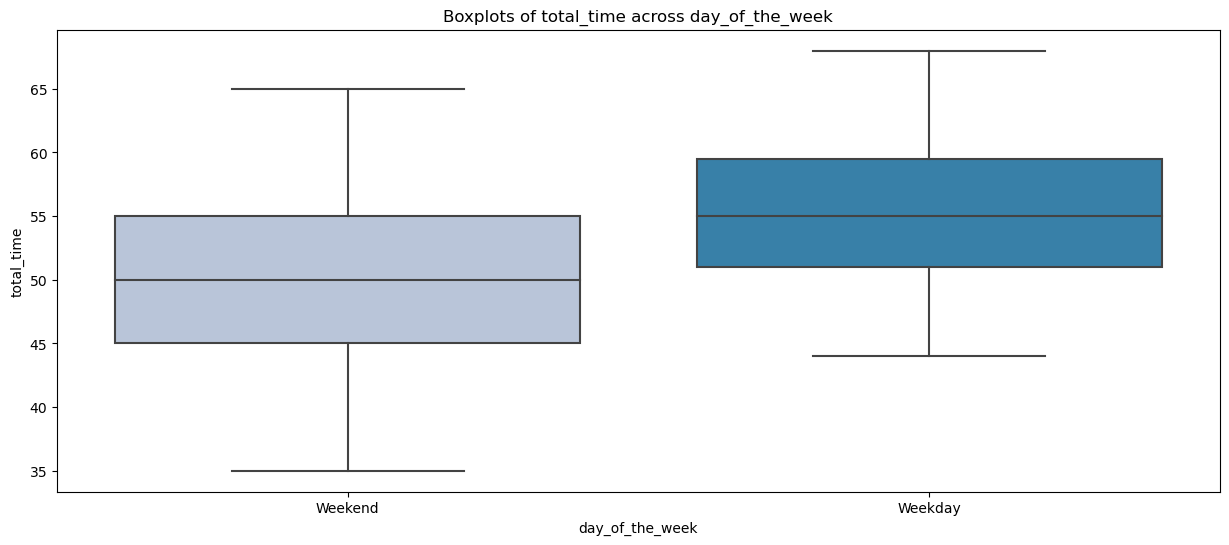

In [308]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'day_of_the_week', y = 'total_time', data = df_duplicate, palette = 'PuBu')
plt.title('Boxplots of total_time across day_of_the_week')
plt.show()

#### Observation

    1)On average, weekday orders take about 6 minutes longer than weekend orders to be prepared+delivered. 
    2)This could be attributed to traffic level faced by delivery men during weekdays.
    3)Both categories have similar variation in their distribution of the total time.

#### Revenue generated by the restaurants.

In [309]:
#return total order cost across 'restaurant' categories. show top 15
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).to_frame().head(15) 

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


In [310]:
#return total order cost across 'restaurant' categories. show bottom 15
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).to_frame().tail(15)

,cost_of_the_order
restaurant_name,
Rye House,12.13
Frank Restaurant,12.08
Samurai Mama,11.64
Lamarca Pasta,9.22
Balade,9.22
Gaia Italian Cafe,8.78
Chola Eclectic Indian Cuisine,8.73
Woorijip,8.25
'wichcraft,8.10


#### Observation

    1)Shake Shack made the most revenue, followed by The Meatball Shop and Blue Ribbon Sushi.
    2)Hunan Manor made the least revenue.
    3)There are 178 restaurant. Visualization of the revenues across all 178 restaurants would overwhelm the screen.

#### Revenue generated by the cuisines.

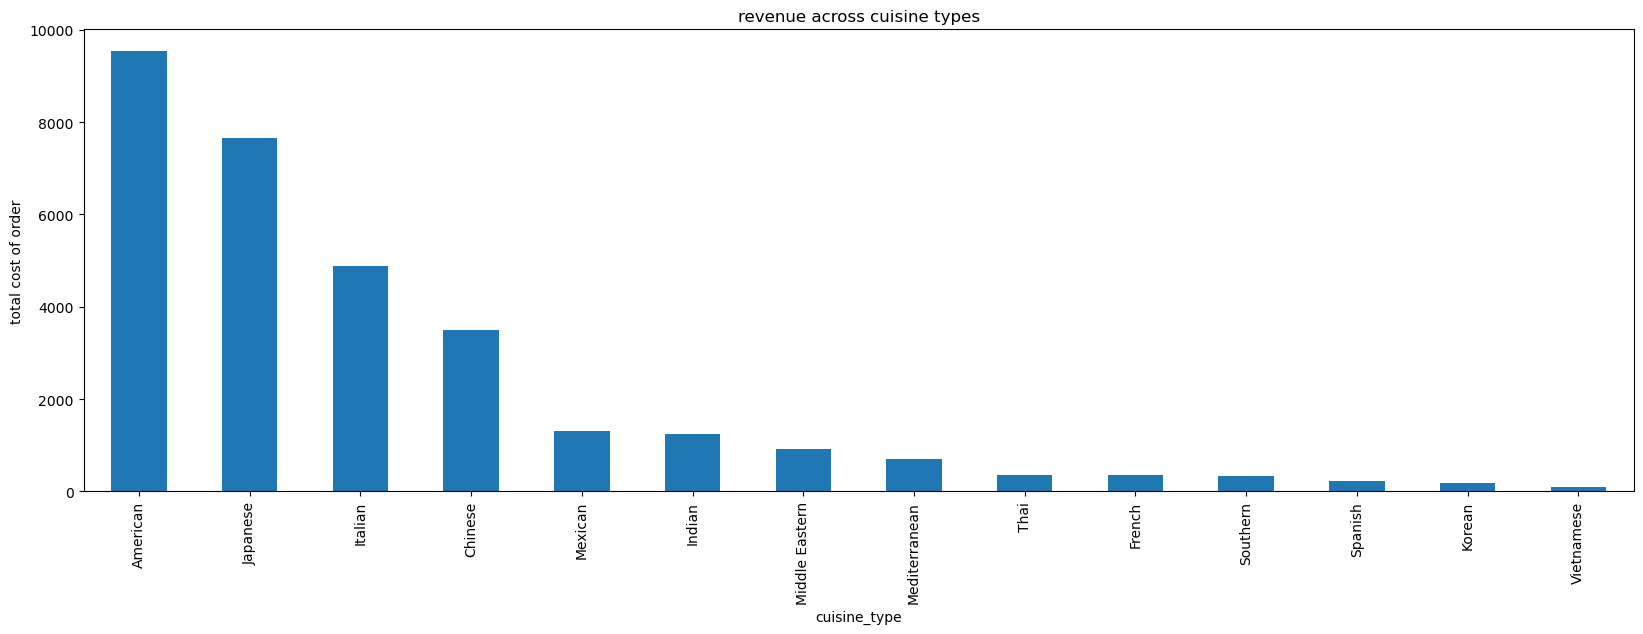

In [311]:
# setting the figure size
plt.figure(figsize=(20,6)) 
#barplot
df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('total cost of order')
plt.title('revenue across cuisine types')
plt.show()

In [312]:
#return total revenue for each cuisine category and sort
df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False).to_frame()

,cost_of_the_order
cuisine_type,
American,9530.78
Japanese,7663.13
Italian,4892.77
Chinese,3505.62
Mexican,1303.85
Indian,1235.14
Middle Eastern,922.21
Mediterranean,711.84
Thai,364.95


#### Observation

    1)American, Japanese and Italian generated the most revenue in that order.
    2)Vietnamese, Korean, Spanish and Southern cuisines generated the least revenue.

#### Rating vs Delivery time

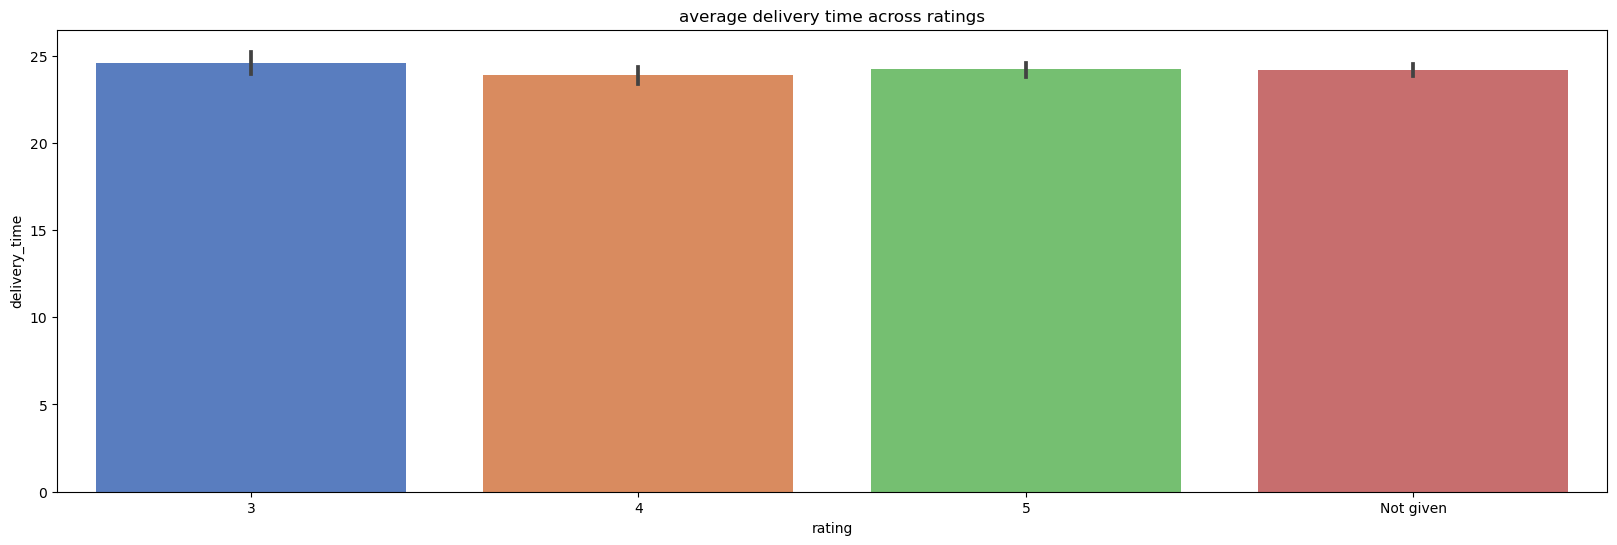

In [313]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df.groupby('rating')['delivery_time'].mean().index.values#.sort_values(ascending=False).index.values
#barplot
ax = sns.barplot(x='rating', y='delivery_time', data=df, palette='muted',order=plot_order)
plt.title('average delivery time across ratings')
plt.show()

In [314]:
#return average delivery time for each rating category and round 2 decimal places
round(df.groupby('rating').agg({'delivery_time':['mean']}),2)

,delivery_time
,mean
rating,
3,24.56
4,23.87
5,24.21
Not given,24.17


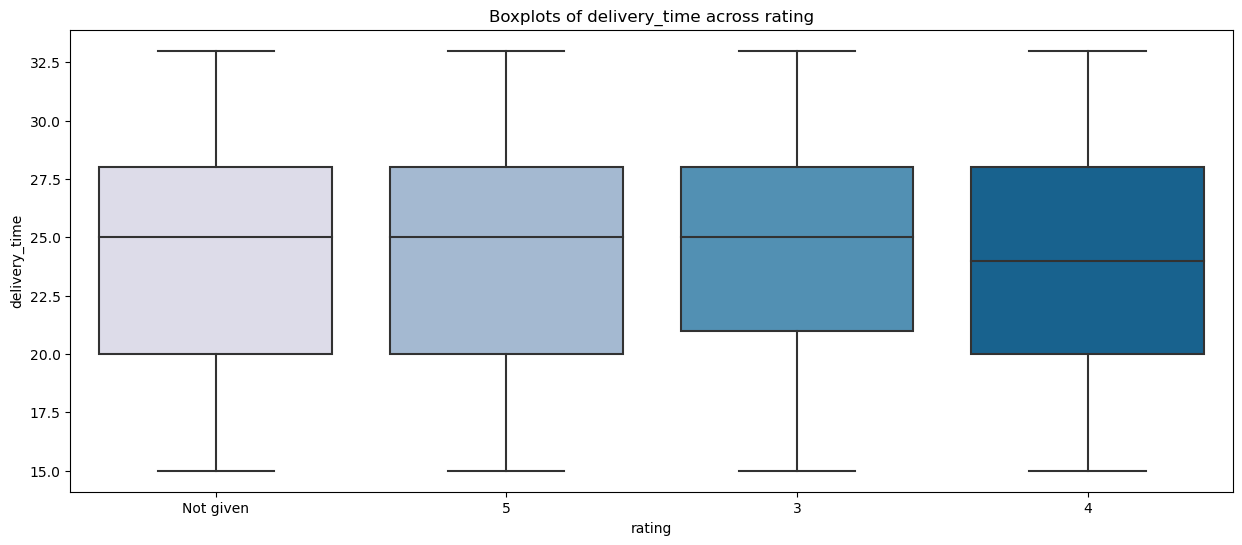

In [315]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df, palette = 'PuBu')
plt.title('Boxplots of delivery_time across rating')
plt.show()

#### Observation

    1)Average delivery time appears similar across all rating categories including unrated orders.
    2)All rating categories have similar variation in their distribution of the delivery time.

#### Rating vs Food preparation time

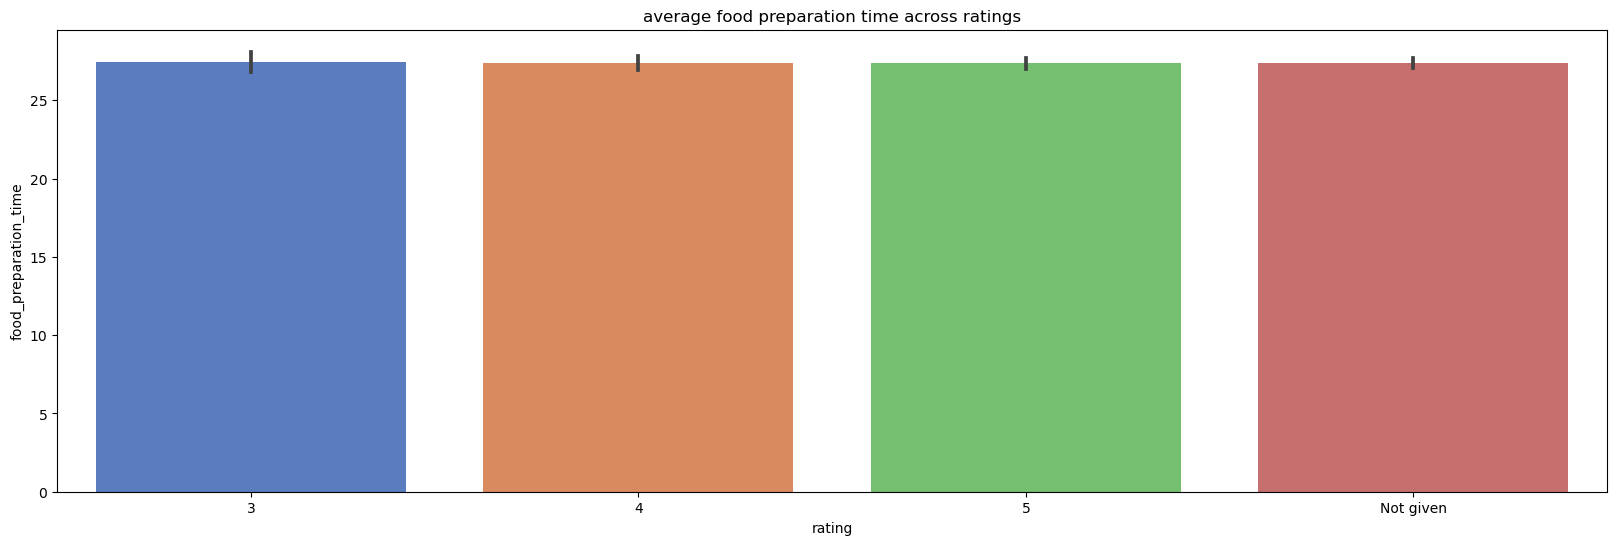

In [316]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df.groupby('rating')['food_preparation_time'].mean().index.values
#barplot
ax = sns.barplot(x='rating', y='food_preparation_time', data=df, palette='muted',order=plot_order)
plt.title('average food preparation time across ratings')
plt.show()

In [317]:
#return average food preparation time for each rating category and round 2 decimal places
round(df.groupby('rating').agg({'food_preparation_time':['mean']}),2)

,food_preparation_time
,mean
rating,
3,27.43
4,27.40
5,27.36
Not given,27.36


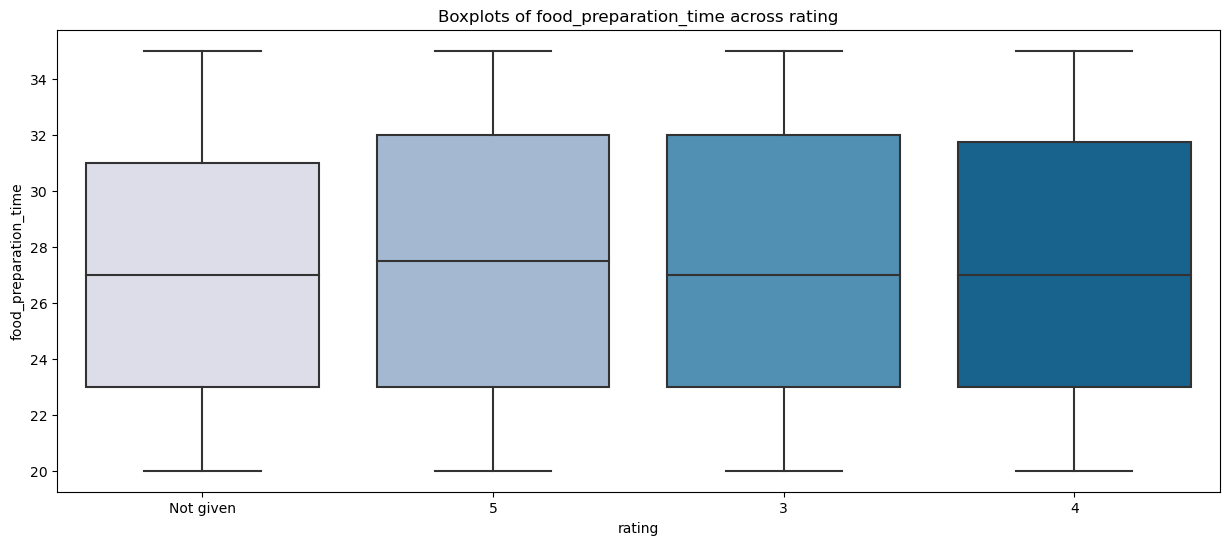

In [318]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df, palette = 'PuBu')
plt.title('Boxplots of food_preparation_time across rating')
plt.show()

#### Observation

    1)Average food preparation time appears similar across all rating categories including unrated orders.
    2)All rating categories have similar variation in their distribution of the food preparation time.

#### Rating vs Total time

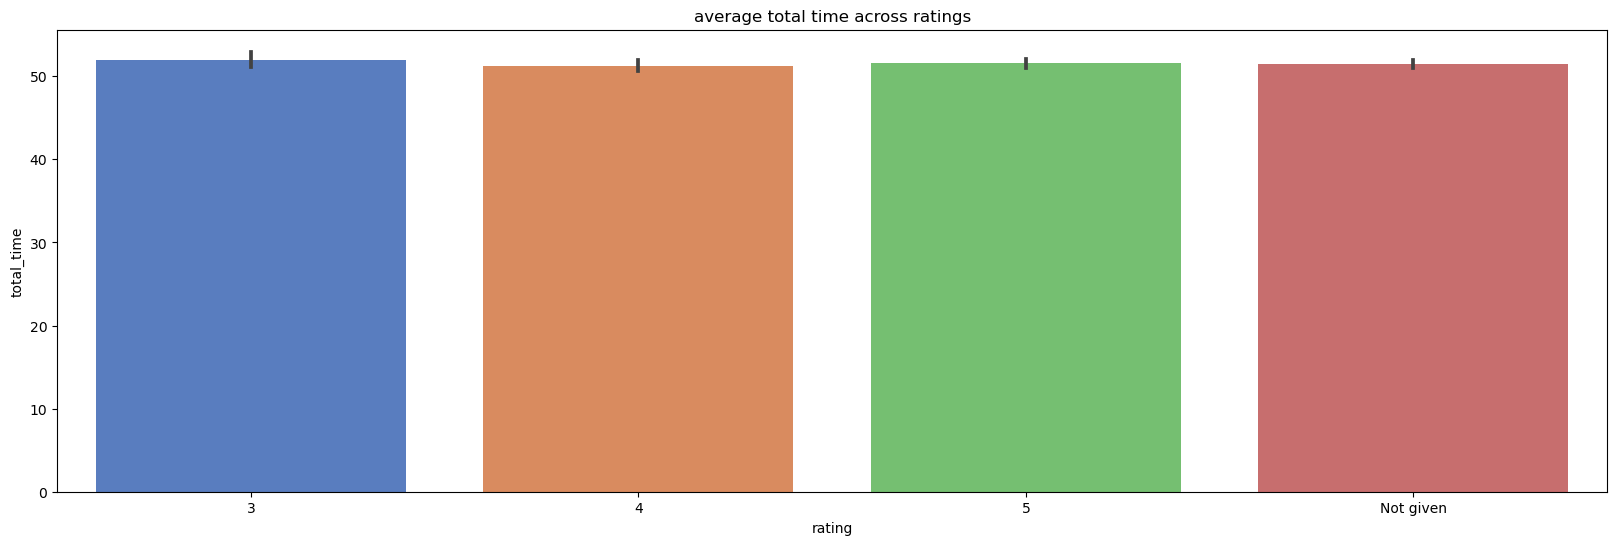

In [319]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df_duplicate.groupby('rating')['total_time'].mean().index.values
#barplot
ax = sns.barplot(x='rating', y='total_time', data=df_duplicate, palette='muted',order=plot_order)
plt.title('average total time across ratings')
plt.show()

In [320]:
#return average total time (preparation+delivery time) for each rating category and round 2 decimal places 
round(df_duplicate.groupby('rating').agg({'total_time':['mean']}),2)

,total_time
,mean
rating,
3,51.99
4,51.26
5,51.57
Not given,51.53


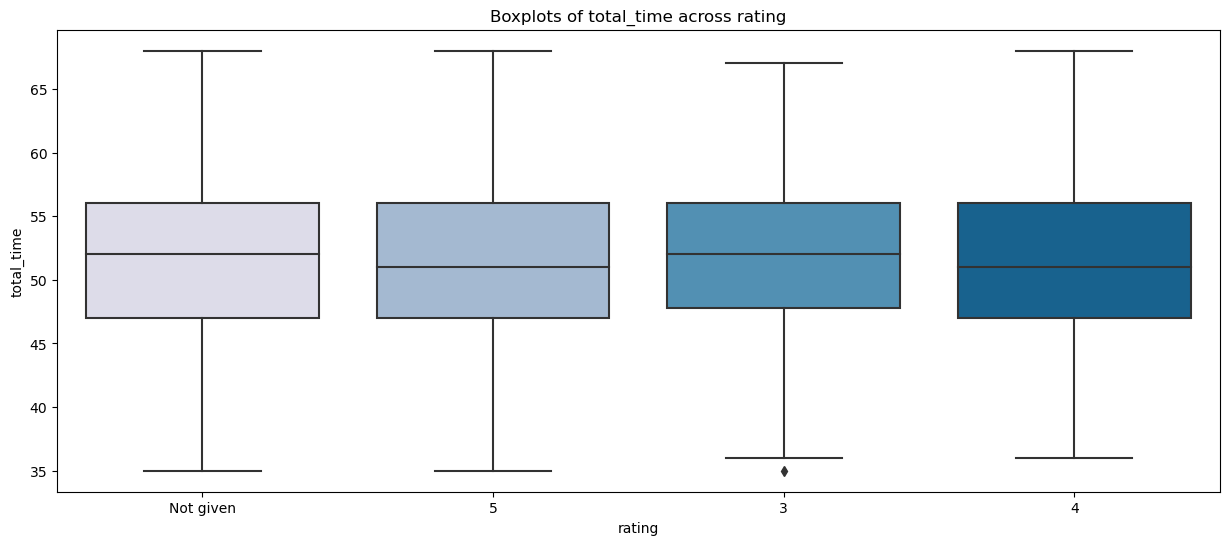

In [321]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'rating', y = 'total_time', data = df_duplicate, palette = 'PuBu')
plt.title('Boxplots of total_time across rating')
plt.show()

#### Observation

    1)Average total time appears similar across all rating categories including unrated orders.
    2)All rating categories have similar variation in their distribution of the total time.
    3)Rating category 3 has an outlier.

#### Rating vs Cost of the order

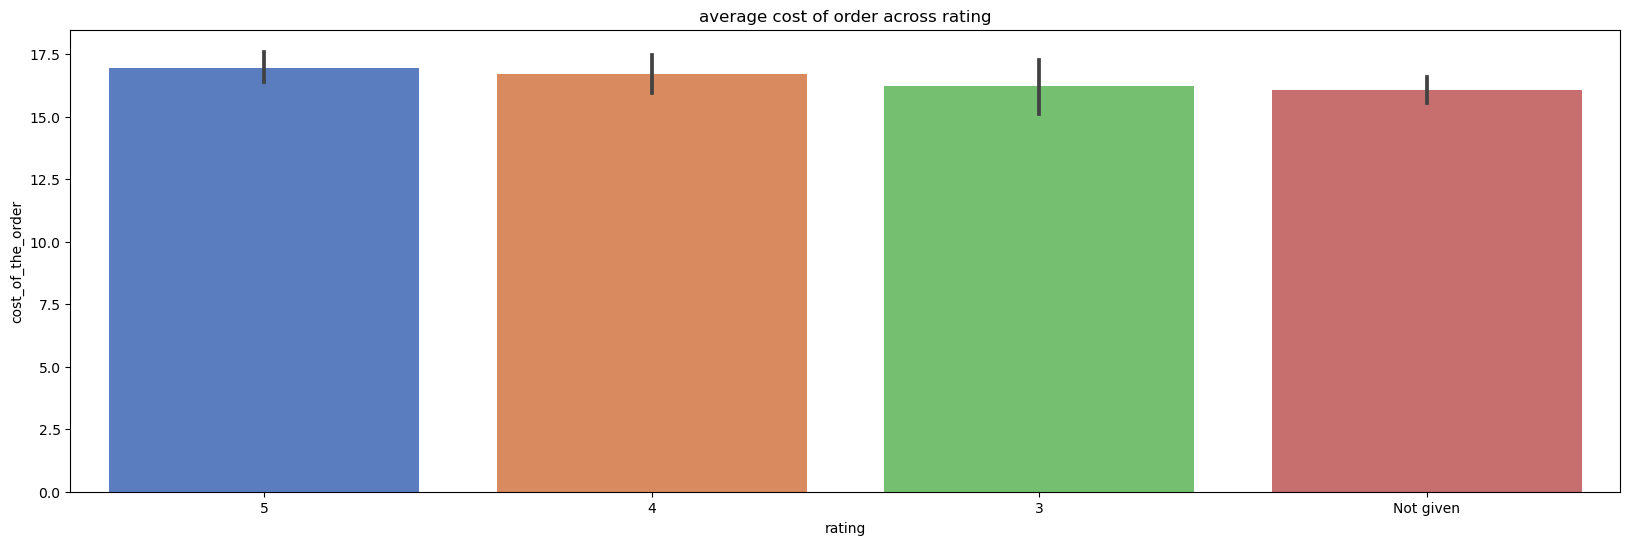

In [322]:
# setting the figure size
plt.figure(figsize=(20,6))
#specify order of bars
plot_order = df.groupby('rating')['cost_of_the_order'].mean().sort_values(ascending=False).index.values
#barplot
ax = sns.barplot(x='rating', y='cost_of_the_order', data=df, palette='muted',order=plot_order)
plt.title('average cost of order across rating')
plt.show()

In [323]:
#return average order cost for each rating category and round 2 decimal places
round(df.groupby('rating').agg({'cost_of_the_order':['mean']}),2)

,cost_of_the_order
,mean
rating,
3,16.22
4,16.71
5,16.97
Not given,16.09


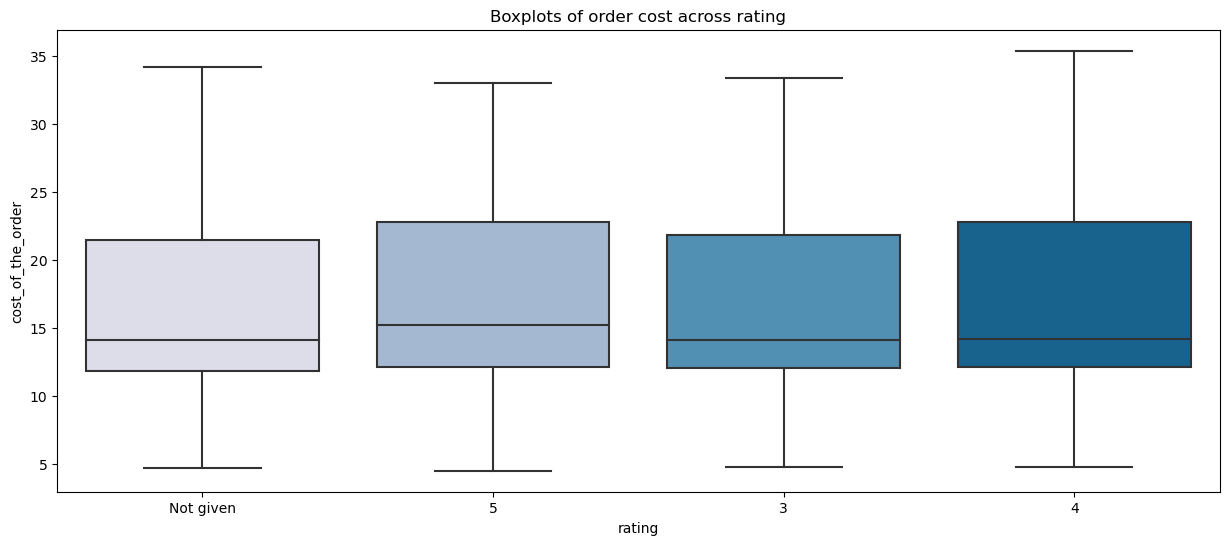

In [324]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df, palette = 'PuBu')
plt.title('Boxplots of order cost across rating')
plt.show()

#### Observation

    1)Average cost of order appears similar across all rating categories. 
    2)Unrated orders have the least average cost.
    3)Rating categories have similar variation in their distribution of the cost of order.

#### Correlation among variables

In [325]:
num_var = ['cost_of_the_order','food_preparation_time','delivery_time'] #list of numerical variable names
corr = df[num_var].corr()#correlation matrix
corr #return correlation matrix

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


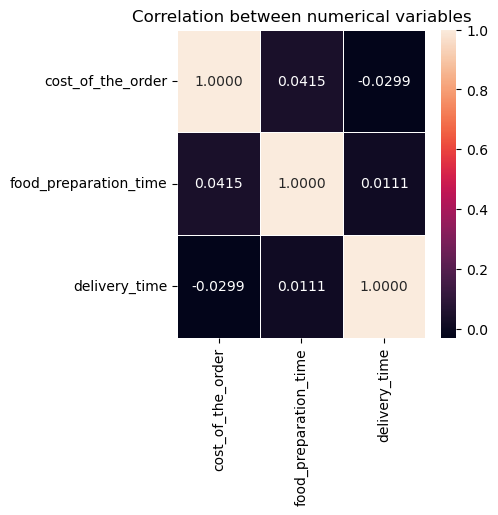

In [326]:
#heatmap of correlation
f,ax = plt.subplots(figsize=(4, 4)) #set plot size
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.4f',ax=ax) #heatmap
plt.title('Correlation between numerical variables')#title
plt.show()

<Figure size 400x400 with 0 Axes>

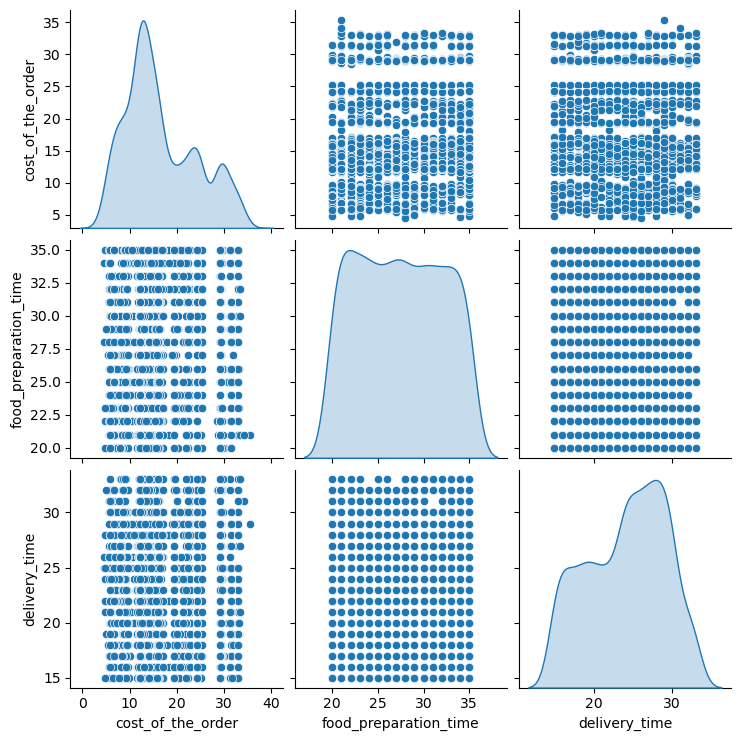

In [327]:
#pairplot of numerical variables
plt.figure(figsize=(4, 4))
sns.pairplot(df[num_var], diag_kind='kde')
plt.show()

#### Observation

    1)No noticeable correlation among numerical variables (cost, food preparation and delivery time)

### Restaurants with a rating count of more than 50 and the average rating greater than 4.

In [328]:
#Get an idea of how many orders without rating
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [329]:
#Exclude all orders without rating 
df_rated = df[df['rating']!='Not given']
# Create a dataframe that contains the restaurant names with their rating counts
df_rated_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rated_count.head() #show top 5

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [330]:
# Get the restaurant names that have rating count more than 50
restaurant_pre_select = df_rated_count[0:4]['restaurant_name']
restaurant_pre_select

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [331]:
#convert the rating column from object to int datatype
df_rated['rating'] = df_rated["rating"].astype(str).astype(int)

In [332]:
#use a for-loop to sieve out all orders corresponding to the restaurant list created above
df_rated_4 = pd.DataFrame()
for i in restaurant_pre_select:
    df_temp = df_rated[df_rated['restaurant_name'] == i]
    df_rated_4 = df_rated_4.append(df_temp) 

In [333]:
#use pivot table to find the average rating across all 4 restaurants and round 2 decimal places
round(pd.pivot_table(data=df_rated_4, values='rating', index='restaurant_name').sort_values(by='rating',ascending = False),2)

,rating
restaurant_name,
The Meatball Shop,4.51
Blue Ribbon Fried Chicken,4.33
Shake Shack,4.28
Blue Ribbon Sushi,4.22


#### Observations:


    1)The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi meet the criteria for the promotional offer.
    2)They each have more than 50 ratings and average ratings greater than 4.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. 

### Net revenue generated by the company across all orders

In [334]:
df_duplicate2 = df.copy() #create duplicate of original dataframe
#create a for-loop to fill the rows of a new column 'revenue'
#the entries into the new column depends on the value in the corresponding 'cost_of_the_order'
L = len(df_duplicate2) #number of rows in df
for i in range(L): #loop through all the rows
    #revenue is 25% of order cost if order cost more than $20
    if (df_duplicate2.loc[i,'cost_of_the_order']>20): df_duplicate2.loc[i,'revenue'] = 0.25*df_duplicate2.loc[i,'cost_of_the_order']
    #revenue is 15% of order cost if order cost is between $5 and $20
    elif (df_duplicate2.loc[i,'cost_of_the_order'] > 5): df_duplicate2.loc[i,'revenue'] = 0.15*df_duplicate2.loc[i,'cost_of_the_order']
    #else no revenue
    else: df_duplicate2.loc[i,'revenue'] = 0  

#net revenue is sum of all entries in the 'revenue'
round(df_duplicate2['revenue'].sum(),2)

6166.3

#### Observations:


    1)Net revenue generated by the company (FoodHub) across all orders is $6166.30

### Percentage of orders taking more than 60 minutes to get delivered from the time the order is placed

In [335]:
#create duplicate of original dataframe
df_duplicate3 = df.copy()
#create a new column ['total_time'] and fill it up
df_duplicate3['total_time'] = df_duplicate3['delivery_time'] + df_duplicate3['food_preparation_time']
#number of orders with total time greater than 60 minutes
l_1 = len(df_duplicate3[df_duplicate3['total_time']>60])
#number of all orders
l = len(df_duplicate3)
#percentage
per = round(l_1/l,4)
print(per*100)

10.54


#### Observations:


    1)10.54% of the orders took more than 60 minutes to prepare and deliver

### Mean delivery time on weekdays and weekends

In [336]:
#return average delivery time for each 'day of the week' category and round 2 decimal places
round(df.groupby('day_of_the_week').agg({'delivery_time':['mean']}),2)

,delivery_time
,mean
day_of_the_week,
Weekday,28.34
Weekend,22.47


#### Observations:


    1)Mean delivery time takes longer during weekday.
    2)On average, weekday orders take about 6 minutes longer than weekend orders to be delivered. 
    3)This could be attributed to traffic level during weekdays.

### Conclusion and Recommendations

### Conclusions:

I analyzed a dataset of about 2000 food orders across 178 restaurants and 14 cuisines made on weekdays and weekends on the FoodHub app. The main features of interest are the revenue generated, food preparation time, delivery time and observable insights into them. Not all restaurant and cuisines are equally profitable. And delivery time varied with the time of the week. Thus, i have determined the factors that affect revenue generated and delivery time.

I have been able to conclude the following:

    1)There are 1200 unique customers in the data. Some customers ordered more than once.
    2)French, Southern, Thai are the most expensive cuisine. Mediterranean, Korean and Vietnamese are the most affordable.
    3)American, Japanese, Italian and Chinese generated the most revenue in that order. Other cuisines made significantly less money.
    4)These 4 cuisines are also the most popular cuisines. They make up about 83% of all orders. The ten other cuisines make up 17% of all orders.
    5)All cuisines take similar food preparation time.
    6)Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 popular restaurants in that order.
    7)Shake Shack and The Meatball Shop restaurants made the most money. 122 restaurants made less than 100 dollars in revenue.
    8)Average time to prepare food is about 27 minutes.
    9)On average, weekday orders take about 6 minutes longer than weekend orders to be delivered.
    10)There are significantly more orders on weekends than weekdays, more than twice as much.
    11)Cost of order has a mean value of 16.5dollars. 75% orders cost less than 23 dollars.
    12)Most orders don't have a rating. 5 is the most frequent rating. 3 is the least frequent rating
    13)Average delivery time and preparation time appear consistent across all rating categories.
    14)Average order cost also appears consistent across all rating categories.
    15)No noticeable correlation among cost, food preparation and delivery time.

### Recommendations:

    1)American, Japanese, Italian and Chinese are the most profitable cuisines and this needs to be sustained. 
    2)Some cuisines (Thai, French, Korean, Southern, Spanis and Vietnamese) had less than 20 orders. Restaurants should do more to improve the popularity of these cusines. Popularity could also be boosted on Foodhub app.
    3)122 restaurants made less than 100 dollars in revenue. This is not profitable. There continuation on the aggregator app needs to be re-evaluated.
    4)On average, weekday orders take about 6 minutes longer than weekend orders to be delivered. This could be attributed to traffic level during weekdays. Foodhub should look into improving driver selection and routing algorithm to improve delivery time during weekdays.
    5)Average cost, delivery time and preparation time do not appear to vary across all rating categories. Rating could be related to other factors like quality of food, quality of customer service experience on the app and with the delivery person, etc. To establish this, customers should be asked to further rate service based on these other factors.